# Pandas

* Standardalias `pd`
* erlaubt Datenzugriff auf verschiedenste Arten
* neue Datentypen:
    * `Series` - 1D array mit Index (Excel-Spalte)
    * `DataFrame` - 2D array mit Index (Excel-Spreadsheet)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
series = pd.Series(data=[1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
print(series, series['a'], sep='\n')

a    1
b    2
c    3
d    4
dtype: int64
1


In [5]:
htl_if = {'Room': ['N312', 'N313', 'N304', 'N317'],
          'KV': ['SCRE', 'WISS', 'NEUL', 'BUCH'],
          'Size': [23, 22, 19, 25]}
dataframe = pd.DataFrame(data=htl_if, index=['4AHIF', '4BHIF', '5AHIF', '5BHIF'])
dataframe

Room    KV  Size
4AHIF  N312  SCRE    23
4BHIF  N313  WISS    22
5AHIF  N304  NEUL    19
5BHIF  N317  BUCH    25

### Einlesen

* über die zahlreichen `readXXX`-Methoden
* Viele Optionen, wie Beispielsweise
    * Delimiter
    * Kommaformat
    * `""/''` Escaping

In [7]:
energy = pd.read_csv('./data/owid-energy-data.csv')
energy.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17432 entries, 0 to 17431
Data columns (total 122 columns):
 #    Column                                   Dtype  
---   ------                                   -----  
 0    iso_code                                 object 
 1    country                                  object 
 2    year                                     int64  
 3    coal_prod_change_pct                     float64
 4    coal_prod_change_twh                     float64
 5    gas_prod_change_pct                      float64
 6    gas_prod_change_twh                      float64
 7    oil_prod_change_pct                      float64
 8    oil_prod_change_twh                      float64
 9    energy_cons_change_pct                   float64
 10   energy_cons_change_twh                   float64
 11   biofuel_share_elec                       float64
 12   biofuel_elec_per_capita                  float64
 13   biofuel_cons_change_pct                  float64
 14   biof

In [9]:
energy.sample(3)

iso_code         country  year  coal_prod_change_pct  \
8791       LBY           Libya  1954                   NaN   
4310       NaN  Czechoslovakia  2002                 0.000   
11175      NaN   North America  1927                -8.686   

       coal_prod_change_twh  gas_prod_change_pct  gas_prod_change_twh  \
8791                    NaN                  NaN                 0.00   
4310                    NaN                  NaN                  NaN   
11175              -400.223               10.119                43.88   

       oil_prod_change_pct  oil_prod_change_twh  energy_cons_change_pct  ...  \
8791                   NaN                0.000                     NaN  ...   
4310                   NaN                  NaN                     NaN  ...   
11175               10.805              151.144                     NaN  ...   

       solar_elec_per_capita  solar_energy_per_capita           gdp  \
8791                     NaN                      NaN  3.451308e+09   
4310                     NaN                      NaN  2.740000e+11   
11175                    NaN                      NaN           NaN   

       wind_share_elec  wind_cons_change_pct  wind_share_energy  \
8791               NaN                   NaN                NaN   
4310               NaN                   NaN                NaN   
11175              NaN                   NaN                NaN   

       wind_cons_change_twh  wind_consumption  wind_elec_per_capita  \
8791                    NaN               NaN                   NaN   
4310                    NaN               NaN                   NaN   
11175                   NaN               NaN                   NaN   

       wind_energy_per_capita  
8791                      NaN  
4310                      NaN  
11175                     NaN  

[3 rows x 122 columns]

### Selection

* `dataframe.feature`
* `dataframe[feature]` falls feature unpraktischen Namen hat

In [16]:
countries = energy.country
isos_countries = energy['iso_code']

* Conditional selection wie bei numpy
* `query` - [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html)

In [40]:
austria = energy[energy['iso_code'] == 'AUT']
germany = energy.query('iso_code == "DEU"')
austria = austria.sort_values(by='year')
austria.loc[:, ['year','gdp']]

year           gdp
1039  1900  1.864771e+10
1040  1901  1.872057e+10
1041  1902  1.945581e+10
1042  1903  1.963850e+10
1043  1904  1.994206e+10
...    ...           ...
1155  2016  3.950000e+11
1156  2017           NaN
1157  2018           NaN
1158  2019           NaN
1159  2020           NaN

[121 rows x 2 columns]

* `loc` operiert auf Zeilen/Spaltenindex
* `iloc` operiert auf Indizespositionen

* iloc - Locate by row/culumn-number
* loc - locate by index column and feature name

In [32]:
head = energy.iloc[-3:, 0:5]
head

iso_code   country  year  coal_prod_change_pct  coal_prod_change_twh
17429      ZWE  Zimbabwe  2017                 8.375                 1.697
17430      ZWE  Zimbabwe  2018                22.555                 4.952
17431      ZWE  Zimbabwe  2019               -35.015                -9.422

In [27]:
head_country_and_pop = energy.loc[:3, ['iso_code', 'population']]
head_country_and_pop

iso_code  population
0      AFG   5021241.0
1      AFG   5053439.0
2      AFG   5085403.0
3      AFG   5118005.0

In [28]:
austria.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 1039 to 1159
Data columns (total 122 columns):
 #    Column                                   Non-Null Count  Dtype  
---   ------                                   --------------  -----  
 0    iso_code                                 121 non-null    object 
 1    country                                  121 non-null    object 
 2    year                                     121 non-null    int64  
 3    coal_prod_change_pct                     119 non-null    float64
 4    coal_prod_change_twh                     64 non-null     float64
 5    gas_prod_change_pct                      73 non-null     float64
 6    gas_prod_change_twh                      64 non-null     float64
 7    oil_prod_change_pct                      100 non-null    float64
 8    oil_prod_change_twh                      64 non-null     float64
 9    energy_cons_change_pct                   54 non-null     float64
 10   energy_cons_change_twh          

C:\Users\chris\AppData\Local\Temp/ipykernel_1576/3904827765.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  austria.info(null_counts=True, verbose=True)


C:\Users\chris\miniconda3\envs\dsai\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chris\miniconda3\envs\dsai\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chris\miniconda3\envs\dsai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chris\miniconda3\envs\dsai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

<Axes: xlabel='year', ylabel='gdp'>

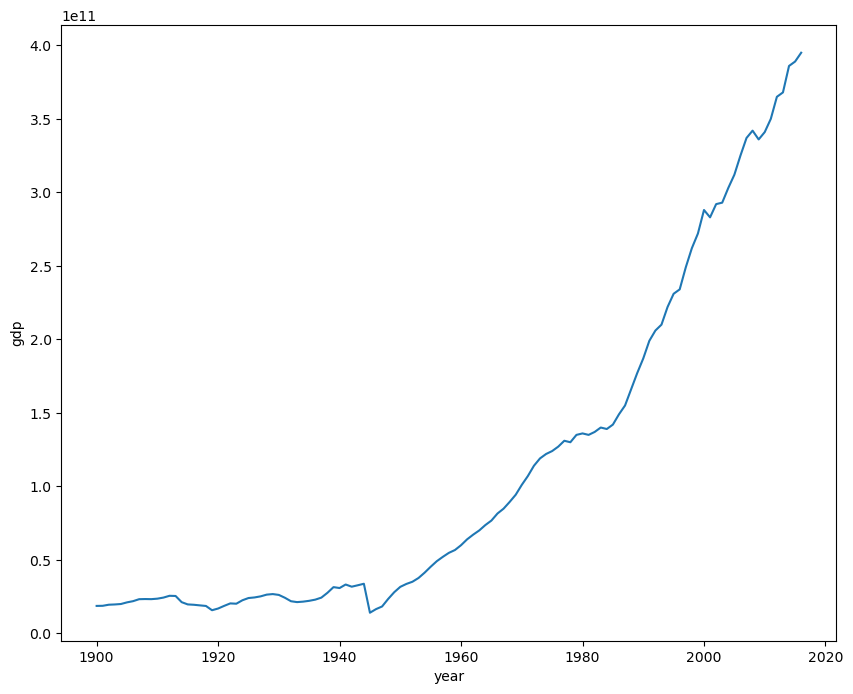

In [42]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.lineplot(data=austria, x='year', y='gdp')
#austria.loc[:, ['biofuel_share_elec', "coal_share_energy"]].plot()

C:\Users\chris\miniconda3\envs\dsai\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chris\miniconda3\envs\dsai\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chris\miniconda3\envs\dsai\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chris\miniconda3\envs\dsai\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

<Axes: xlabel='year', ylabel='gdp'>

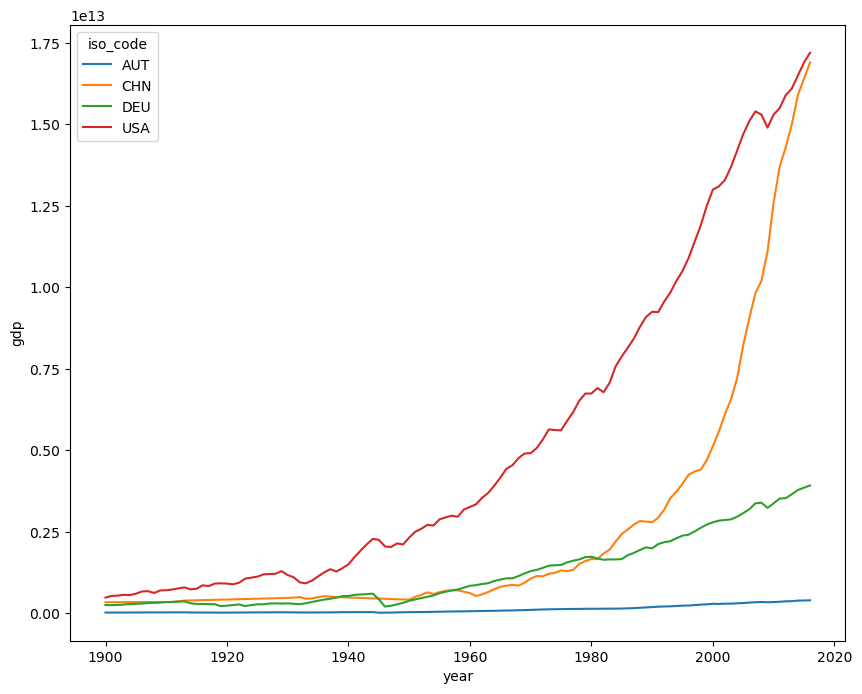

In [41]:
interesting_countries = energy[energy['iso_code'].isin(('AUT', 'DEU', 'CHN', 'USA'))]
sns.lineplot(data=interesting_countries, x='year', y='gdp', hue='iso_code')
#sns.lineplot(data=interesting_countries, x='year', y='renewables_share_elec', hue='iso_code')

<Axes: xlabel='year'>

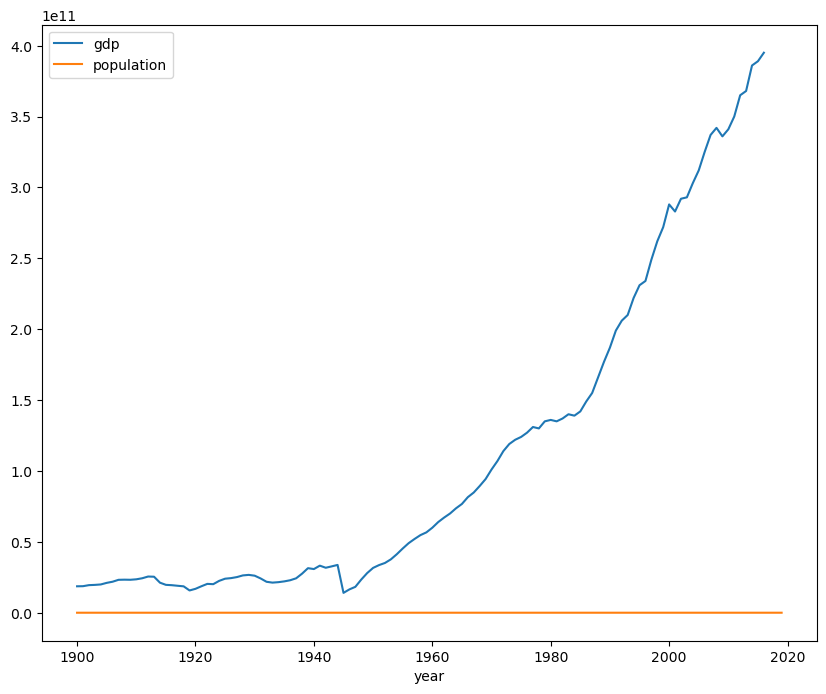

In [45]:
austria.plot(x='year', y=['gdp', 'population'])

<Axes: xlabel='year'>

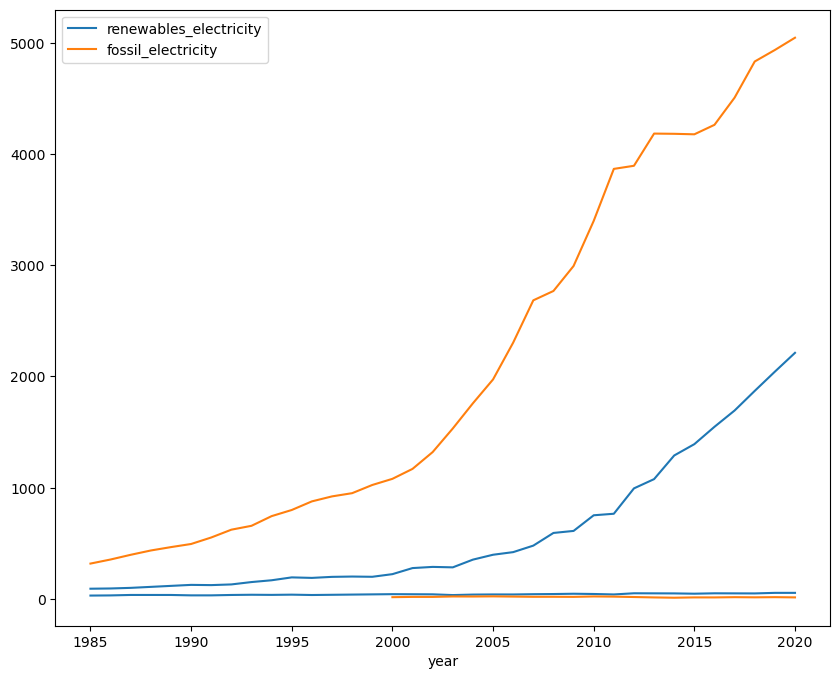

In [49]:
china = energy[energy['iso_code'].isin(('CHN', 'AUT'))]
china.plot(x='year', y=['renewables_electricity', 'fossil_electricity'])

`series.apply(function)` - wendet Funktion auf `series` an

In [47]:
def prefix_iso(country):
    return f'ISO: {country}'

In [53]:
energy.iso_code = energy.iso_code.apply(prefix_iso)
energy.country.apply(lambda c: c.to_upper())
energy.iso_code.sample(10)

8195     ISO: JPN
9976     ISO: MNE
5842     ISO: GAB
6115     ISO: DEU
3274     ISO: CHL
16440    ISO: VIR
819      ISO: ARM
3992     ISO: CUB
7099     ISO: HUN
15307    ISO: THA
Name: iso_code, dtype: object

### Missing Data

* Daten fehlen oft
* entfernen(Zeilen oder Spalten) oder ergänzen

In [50]:
data = pd.DataFrame({'a': [1, 2, np.nan],
                     'b': [3, np.nan, np.nan],
                     'c': [1, 2, 3]})
data

a    b  c
0  1.0  3.0  1
1  2.0  NaN  2
2  NaN  NaN  3

In [53]:
data.isna().sum().sum()

3

In [55]:
data.dropna(axis=1)

c
0  1
1  2
2  3

* `axis`: 0 - zeilenweise, 1 - spaltenweise
* `subset`: index/features in welchen gedroppt werden soll
* `inplace`: Funktion returnt `None` und modifiziert übergebenes Objekt
* `thresh`old: Anzahl nicht-`NaN` Werte, die vorhanden sein müssen

In [59]:
austria_nuclear = austria['nuclear_share_elec']
austria_nuclear

1039    NaN
1040    NaN
1041    NaN
1042    NaN
1043    NaN
       ... 
1155    0.0
1156    0.0
1157    0.0
1158    0.0
1159    0.0
Name: nuclear_share_elec, Length: 121, dtype: float64

In [78]:
data

a    b  c
0  1.0  3.0  1
1  2.0  NaN  2
2  NaN  NaN  3

In [60]:
#data = data.fillna(value='former NaN')
data.fillna(value=data.mean())

a    b  c
0  1.0  3.0  1
1  2.0  3.0  2
2  1.5  3.0  3

In [81]:
data = pd.DataFrame({'Category': ['A', 'B', 'C'] * 3,
                     'Value': [20, np.nan, 40, np.nan, 10, 20, 30, np.nan, 50]})
data

Category  Value
0        A   20.0
1        B    NaN
2        C   40.0
3        A    NaN
4        B   10.0
5        C   20.0
6        A   30.0
7        B    NaN
8        C   50.0

In [89]:
data.groupby('Category')['Value'].mean()

Category
A    25.000000
B    10.000000
C    36.666667
Name: Value, dtype: float64

In [49]:
print(data.groupby('Category')['Value'].mean())
data['Value'] = data.Value.fillna(data.groupby('Category')['Value'].transform('mean'))
data[['Category', 'Value']]

Category
A    25.000000
B    10.000000
C    36.666667
Name: Value, dtype: float64


Category  Value
0        A   20.0
1        B   10.0
2        C   40.0
3        A   25.0
4        B   10.0
5        C   20.0
6        A   30.0
7        B   10.0
8        C   50.0

### Hinzufügen/Entfernen von Zeilen/Spalten

In [95]:
if_rooms_with_kv = dataframe.drop(columns=['Size'])
if_rooms_with_kv

Room    KV
4AHIF  N312  SCRE
4BHIF  N313  WISS
5AHIF  N304  NEUL
5BHIF  N317  BUCH

In [97]:
has_books = pd.Series([True, False, False, True], index=['4AHIF', '4BHIF', '5AHIF', '5BHIF'], name='Has books')
IF = pd.concat([dataframe, has_books], axis=1)
IF

Room    KV  Size  Has books
4AHIF  N312  SCRE    23       True
4BHIF  N313  WISS    22      False
5AHIF  N304  NEUL    19      False
5BHIF  N317  BUCH    25       True

## One Hot Encoding

In [43]:
pd.get_dummies(IF, columns=['Room', 'KV'], drop_first=True)

Size  Has books  Room_N312  Room_N313  Room_N317  KV_NEUL  KV_SCRE  \
4AHIF    23       True          1          0          0        0        1   
4BHIF    22      False          0          1          0        0        0   
5AHIF    19      False          0          0          0        1        0   
5BHIF    25       True          0          0          1        0        0   

       KV_WISS  
4AHIF        0  
4BHIF        1  
5AHIF        0  
5BHIF        0